<h1 align='center'> Introduction to Python Decorators </h1>

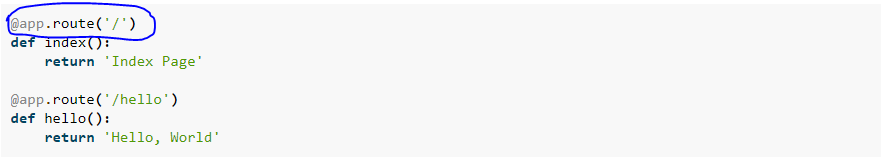

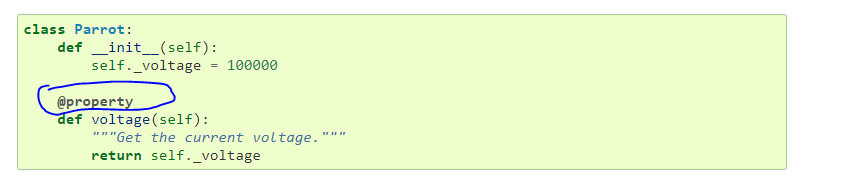

<h2>Decorators are such an important part of Python </h2>

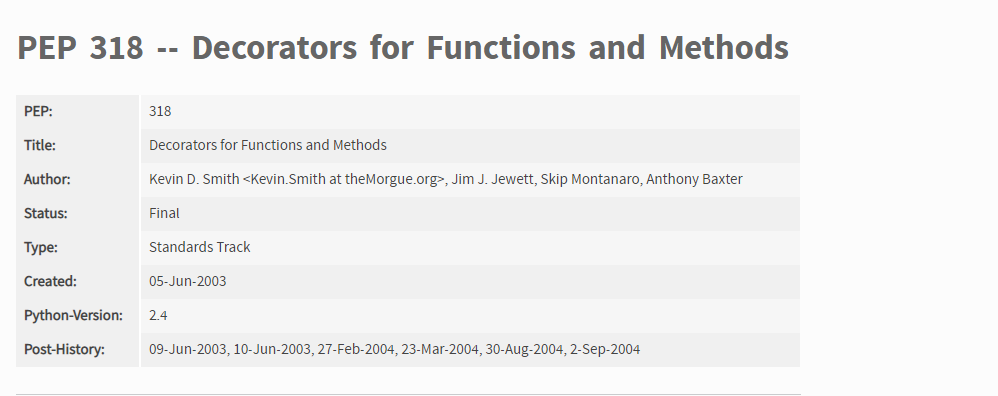

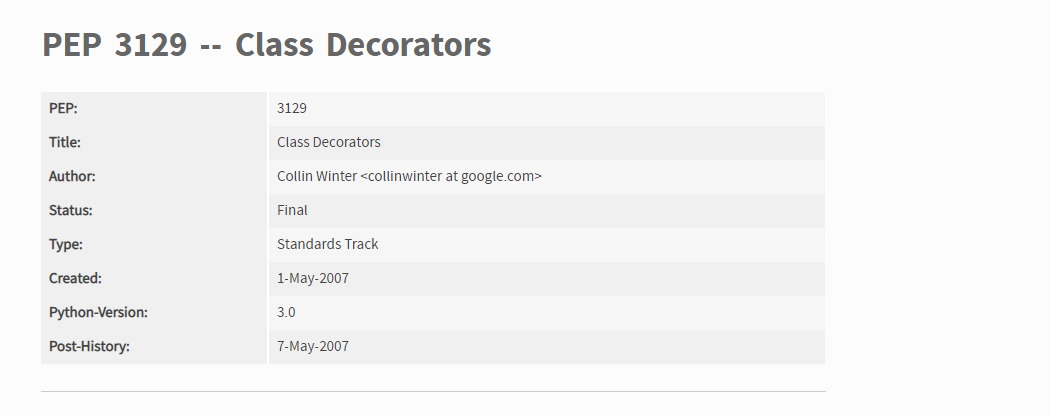

### What are Decorators?

> Decorators "decorate" or "wrap" another function and let you execute code before and after the wrapped function runs.

### Why Decorators?

* Decorators allow you to extend and modify the behavior of a callable (functions, methods, and classes)<br></br><br></br>
* Allow you to do so without modifying the callable itself (the callable's behavior changes only when it's decorated)

### Use Case for decorators

* logging
* enforcing access control and authentication
* instrumentation and timing functions
* rate-limiting
* caching, 

e.g. `%timeit` in Ipython is a decorator under the hood!

### But first, a few things to remember...

* Everything in Python is an object...including functions, classes, etc <br></br><br></br>
* Python functions are first-class objects

- **Demonstrate this on the chalkboard:** Names that we define are simply identifiers that point to objects. That means that various names can be bound to the same object

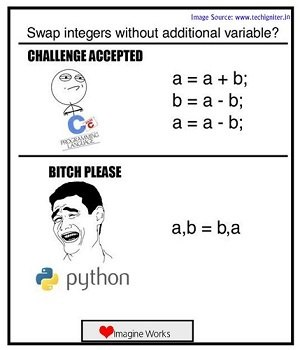

### What does it mean for functions to be first-class objects?<br></br>

* They can be assigned to variables, passed to, and returned from other functions<br></br><br></br>
* Functions can be defined inside other functions

In [1]:
# a function can be assigned to a variable
def print_greet():
    return "Hello World!"

say_it = print_greet
say_it()

'Hello World!'

In [2]:
# a function can return another function
def is_called():
    def is_returned():
        print("Hello world!")
    return is_returned

new = is_called()

new()

Hello world!


In [3]:
# Functions can be passed to other functions

def mind_blowing(func):
    check = func("I hope this is not too difficult to grok")
    print(check)
    
def is_question(text):
    return text + '?'

mind_blowing(is_question)

I hope this is not too difficult to grok?


* Functions that accept other functions as arguments are called higher-order functions<br></br><br></br>

* Examples include map, filter, and reduce

<h3> References </h3> <br></br>

1. Python Tricks - Dan Bader <br></br><br></br>

2. https://www.programiz.com/python-programming/decorator <br></br><br></br>

3.  Implementing timing decorator manually vs timeit: https://stackoverflow.com/questions/1622943/timeit-versus-timing-decorator<br></br><br></br>

4. Awesome Python Decorators: https://github.com/lord63/awesome-python-decorator